In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/istanbul_data_preprocessed.csv')

name_cols = ['MainDistID', 'DistID', 'HcoID', 'SkuID']
categorical_cols = ['HcoType', 'Status']
numerical_cols = ['PaidQty', 'FGQty', 'TotalQuantity']
boolean_cols = ['IsReturn', 'IsMrsOrder']
data['Date'] = pd.to_datetime(data['Date'])

# convert categorical columns to 'category' data type
for col in categorical_cols:
    data[col] = data[col].astype('category')

# convert numerical columns to 'int' data type
for col in numerical_cols:
    data[col] = data[col].astype('int')
    
# convert name columns to str data type
for col in name_cols:
    data[col] = data[col].astype(str)
    
# convert boolean columns to 'bool' data type
for col in boolean_cols:
    data[col] = data[col].astype(bool)
    
raw_data = data.copy()

In [2]:
unique_values = pd.DataFrame(raw_data.nunique(), columns=['Number of Unique Values'])
unique_values = unique_values.loc[['DistID', 'MainDistID', 'HcoID', 'SalesRegionID_x', 'SalesRegionID_y', 'District']]

unique_values

,Number of Unique Values
DistID,63
MainDistID,20
HcoID,5974
SalesRegionID_x,120
SalesRegionID_y,120
District,82


## Top 5 Districts with the highest TotalQuantity

In [3]:
district_total_quantity = raw_data.groupby('District').agg({'TotalQuantity': 'sum'}).sort_values(by='TotalQuantity', ascending=False).head(5)
district_total_quantity

,TotalQuantity
District,
PENDİK,950602
GAZİOSMANPAŞA,890083
FATİH,887909
KÜÇÜKÇEKMECE,848201
KADIKÖY,836680


# Selected SKU's
- I. Segment: 568 (challenge olan), 578, 1050
- II. Segment: 319 (en stabil olan), 509/615, 1018 (düşük satışlı olan)

In [4]:
segment_1_sku_ids = ["568", "578", "1050"]
segment_2_sku_ids = ["319", "509", "615", "1018"]

all_sku_ids = segment_2_sku_ids + segment_1_sku_ids

data = data[data['SkuID'].isin(all_sku_ids)]

## Top 5 Districts with the highest TotalQuantity for seceleced SKU's

In [5]:
highest_district_total_quantity = data.groupby('District').agg({'TotalQuantity': 'sum'}).sort_values(by='TotalQuantity', ascending=False).head(5)
highest_district_total_quantity

,TotalQuantity
District,
GAZİOSMANPAŞA,256822
PENDİK,252614
KÜÇÜKÇEKMECE,242034
ÜMRANİYE,224830
FATİH,209225


In [6]:
highest_districts = ['PENDİK','GAZİOSMANPAŞA','KÜÇÜKÇEKMECE','ÜMRANİYE','FATİH']
data = data[data['District'].isin(highest_districts)]

data

,MainDistID,DistID,Date,HcoID,SalesRegionID_x,BrandID,SkuID,IsReturn,PaidQty,FGQty,IsMrsOrder,HcoType,District,SalesRegionID_y,Status,TotalQuantity
1264,2879266,2878724,2019-01-03,2862447,341903,15,319,False,1,0,False,P,KÜÇÜKÇEKMECE,341903,Active,1
1267,2879266,2878724,2019-01-07,2862447,341903,15,319,False,1,0,False,P,KÜÇÜKÇEKMECE,341903,Active,1
1268,2879266,2878724,2019-01-07,2862447,341903,15,319,False,1,0,False,P,KÜÇÜKÇEKMECE,341903,Active,1
1270,2879266,2878724,2019-01-08,2862447,341903,15,319,False,1,0,False,P,KÜÇÜKÇEKMECE,341903,Active,1
1273,2879266,2878724,2019-01-14,2862447,341903,15,319,False,4,0,False,P,KÜÇÜKÇEKMECE,341903,Active,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191729,2879254,2878817,2021-12-15,2923836,341903,29,568,False,5,0,False,P,KÜÇÜKÇEKMECE,341903,Active,5
4191730,2879254,2878817,2021-12-16,2923836,341903,72,1050,False,3,0,False,P,KÜÇÜKÇEKMECE,341903,Active,3
4191733,2879254,2878817,2021-12-29,2923836,341903,20,509,False,3,0,False,P,KÜÇÜKÇEKMECE,341903,Active,3
4191736,2879266,2878856,2021-12-02,2923836,341903,72,1050,False,1,0,False,P,KÜÇÜKÇEKMECE,341903,Active,1


## Quarterly Sales Analysis

Calculate the total sales of the choosen SKU and MainDistID for quarterly. It should be 12 rows in total for every SKU and MainDistID.

In [7]:
data_quarterly = data.copy()
data_quarterly['Year'] = data_quarterly['Date'].dt.year
data_quarterly['Quarter'] = data_quarterly['Date'].dt.quarter

data_quarterly = data_quarterly.groupby(['Year', 'Quarter', 'District', 'SkuID']).agg({'TotalQuantity': 'sum'}).reset_index()

data_quarterly

,Year,Quarter,District,SkuID,TotalQuantity
0,2019,1,FATİH,1018,521
1,2019,1,FATİH,1050,2362
2,2019,1,FATİH,319,1914
3,2019,1,FATİH,509,1399
4,2019,1,FATİH,568,5741
...,...,...,...,...,...
415,2021,4,ÜMRANİYE,319,3519
416,2021,4,ÜMRANİYE,509,2003
417,2021,4,ÜMRANİYE,568,7537
418,2021,4,ÜMRANİYE,578,5225


In [8]:
data_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           420 non-null    int32 
 1   Quarter        420 non-null    int32 
 2   District       420 non-null    object
 3   SkuID          420 non-null    object
 4   TotalQuantity  420 non-null    int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 13.3+ KB


In [9]:
def plotDistrictBySku(district, df):
    data = df
    data['YearQuarter'] = data['Year'].astype(str) + '-Q' + data['Quarter'].astype(str)
    pivot_table = data.pivot(index='YearQuarter', columns='SkuID', values='TotalQuantity')
    pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))
    plt.title(f'Sales of {district} by SKU over Time')
    plt.xlabel('Year-Quarter')
    plt.ylabel('Total Quantity Sold')
    plt.legend(title='SKU', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

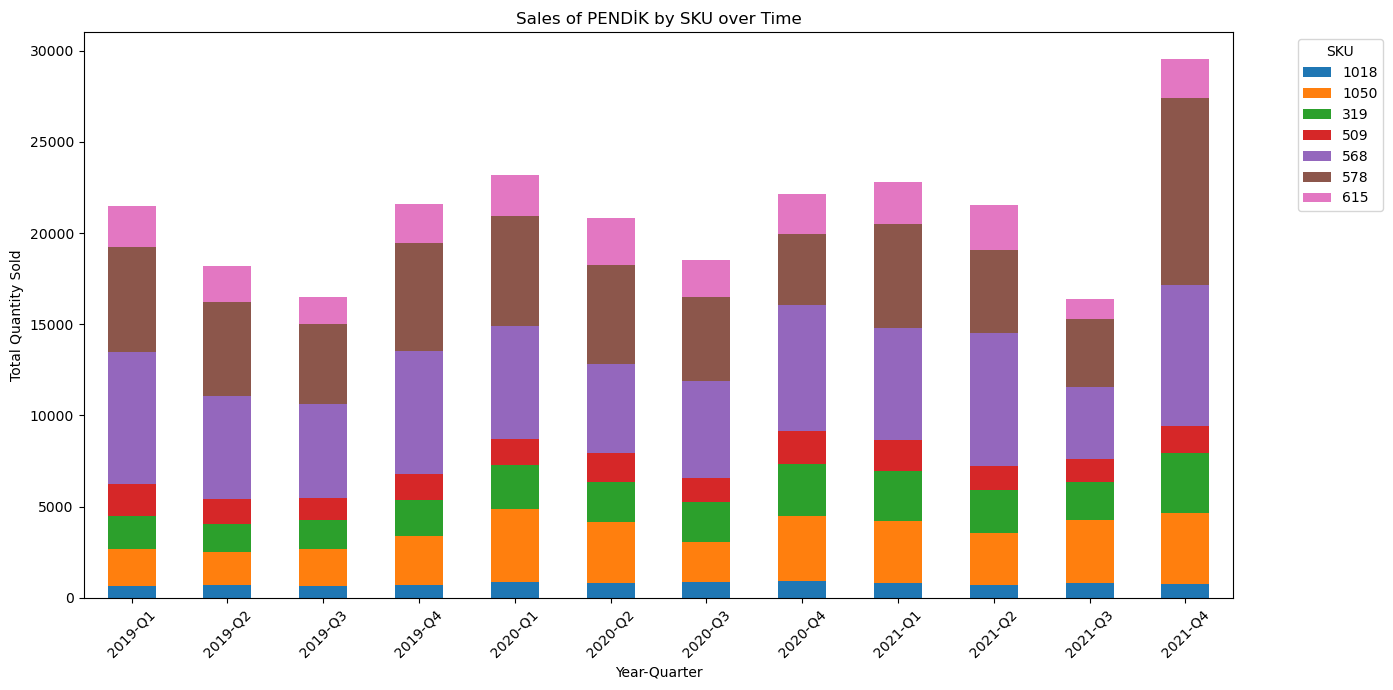

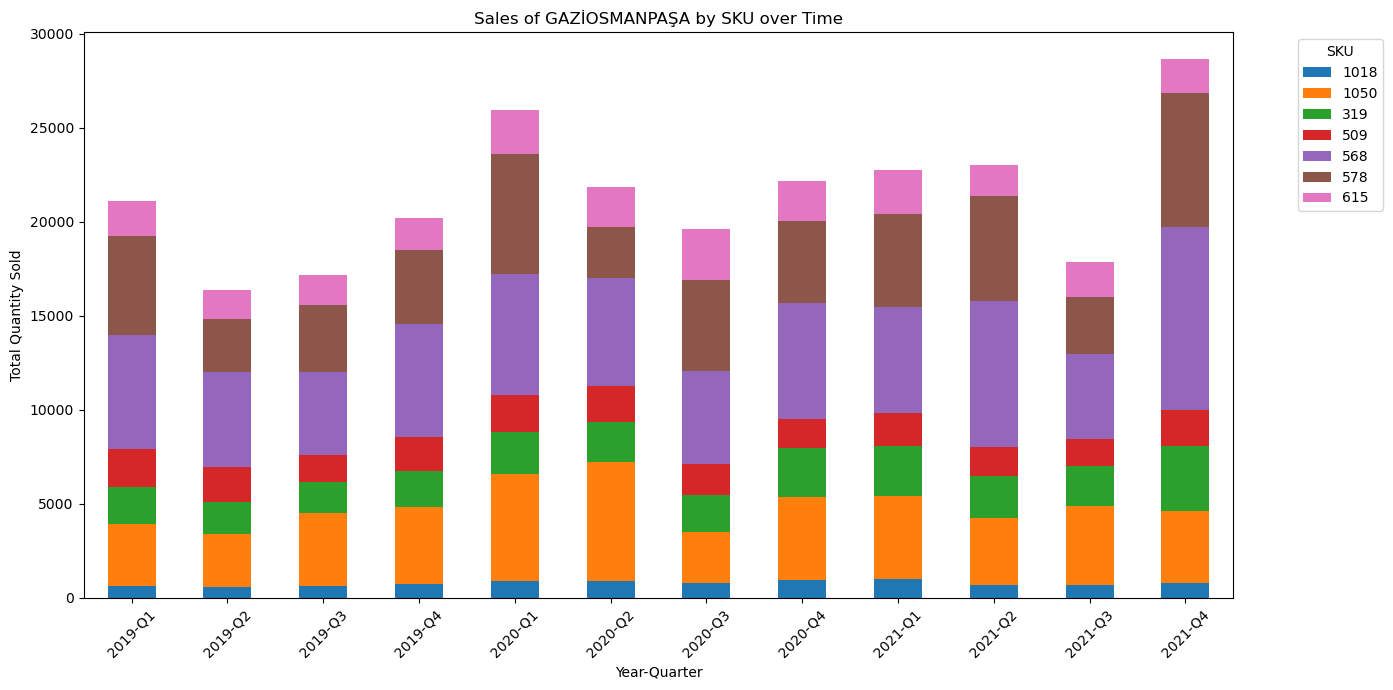

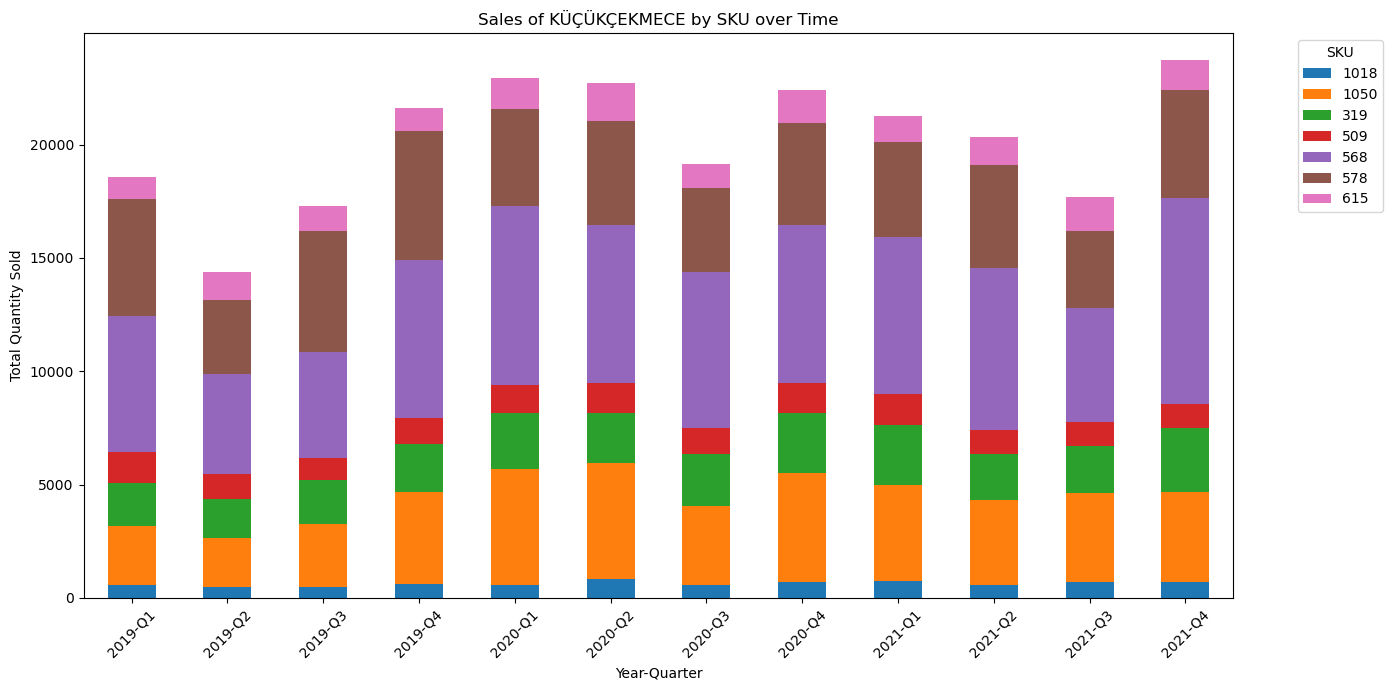

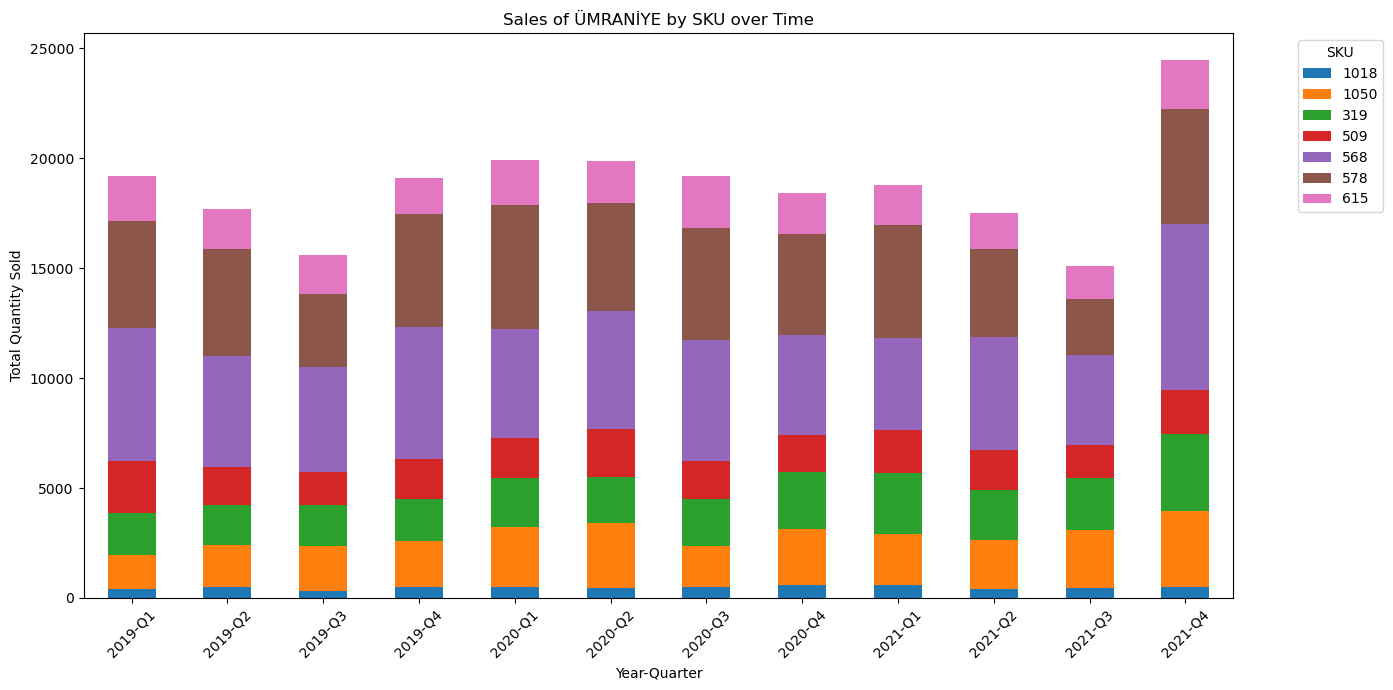

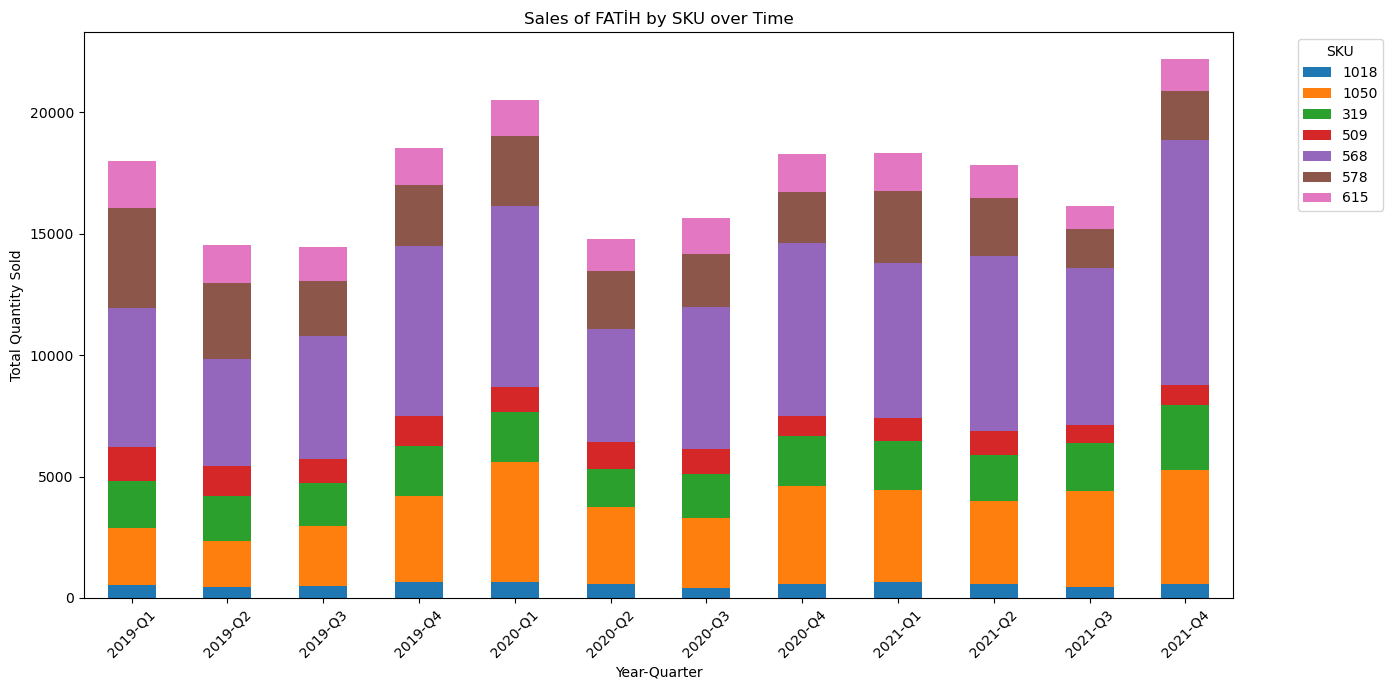

In [10]:
for district in highest_districts:
    df = data_quarterly[data_quarterly['District'] == district]
    plotDistrictBySku(district, df)

### Is there any Trend, Seasonality, Randomness, Slighlty Increasing Trend, or Decreasing Trend in the data?

In [34]:
from statsmodels.tsa.stattools import adfuller

def trend_analysis(df, date_column, value_column, freq='Q'):
    """
    Perform trend analysis on a time series DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    date_column (str): Column name of the date/time data.
    value_column (str): Column name of the values to analyze.
    freq (str): Frequency of the data ('D' for daily, 'M' for monthly, etc.)

    Returns:
    None
    """
    
    # Ensure the date column is of datetime type
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Set the date column as the index
    df.set_index(date_column, inplace=True)
    
    # Resample the data if necessary
    df_resampled = df[value_column].resample(freq).mean()
    
    # Plot the original data
    plt.figure(figsize=(12, 6))
    plt.plot(df_resampled, label='Original Data')
    plt.title('Time Series Data')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()
    
    # Extract the time series
    ts = df[value_column]
    
    # Perform the Augmented Dickey-Fuller test
    adf_result = adfuller(ts)
    adf_output = {
        'Test': 'ADF Test',
        'Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Used Lags': adf_result[2],
        'Number of Observations Used': adf_result[3],
        'Critical Value (1%)': adf_result[4]['1%'],
        'Critical Value (5%)': adf_result[4]['5%'],
        'Critical Value (10%)': adf_result[4]['10%']
    }
    
    # Combine results into a DataFrame
    results_df = pd.DataFrame([adf_output])
    
    return results_df

SKU 319


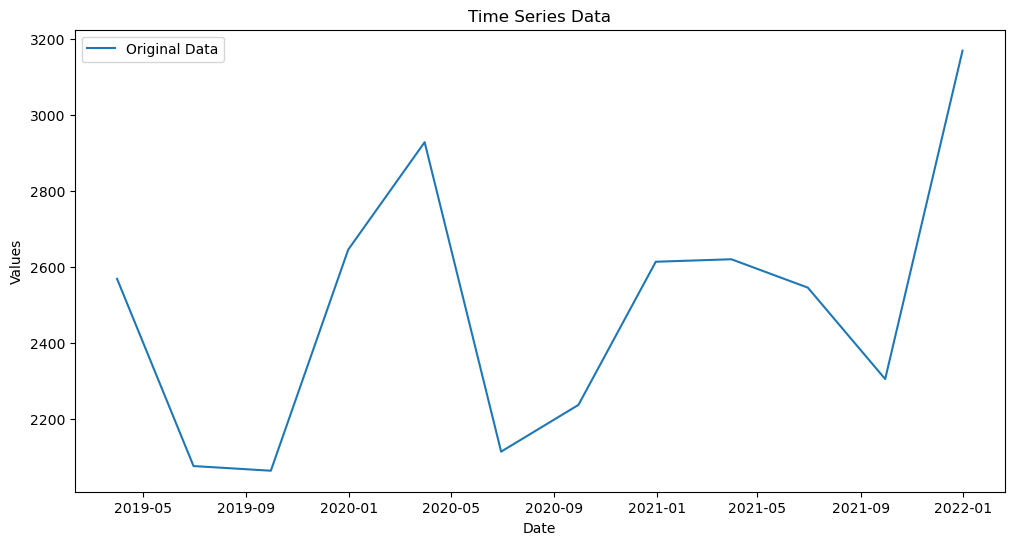

       Test  Statistic   p-value  Used Lags  Number of Observations Used  \
0  ADF Test  -2.815912  0.056037         10                           73   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.523284            -2.902031             -2.588371  
SKU 509


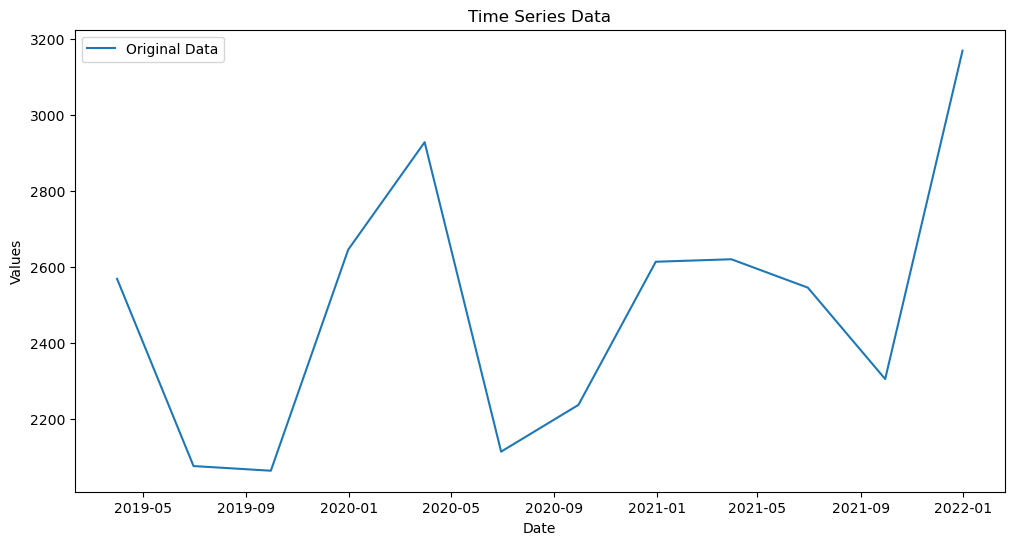

       Test  Statistic   p-value  Used Lags  Number of Observations Used  \
0  ADF Test  -2.815912  0.056037         10                           73   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.523284            -2.902031             -2.588371  
SKU 615


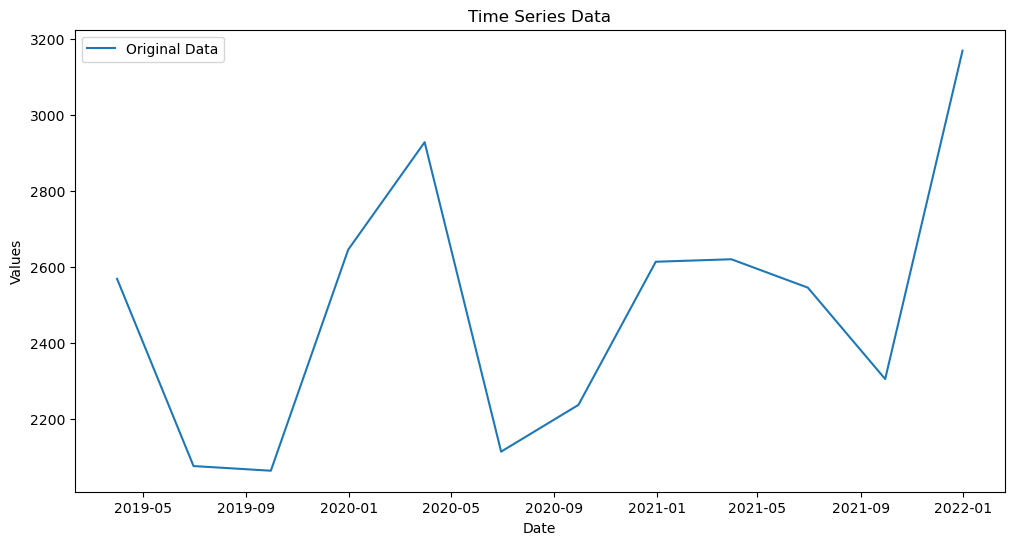

       Test  Statistic   p-value  Used Lags  Number of Observations Used  \
0  ADF Test  -2.815912  0.056037         10                           73   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.523284            -2.902031             -2.588371  
SKU 1018


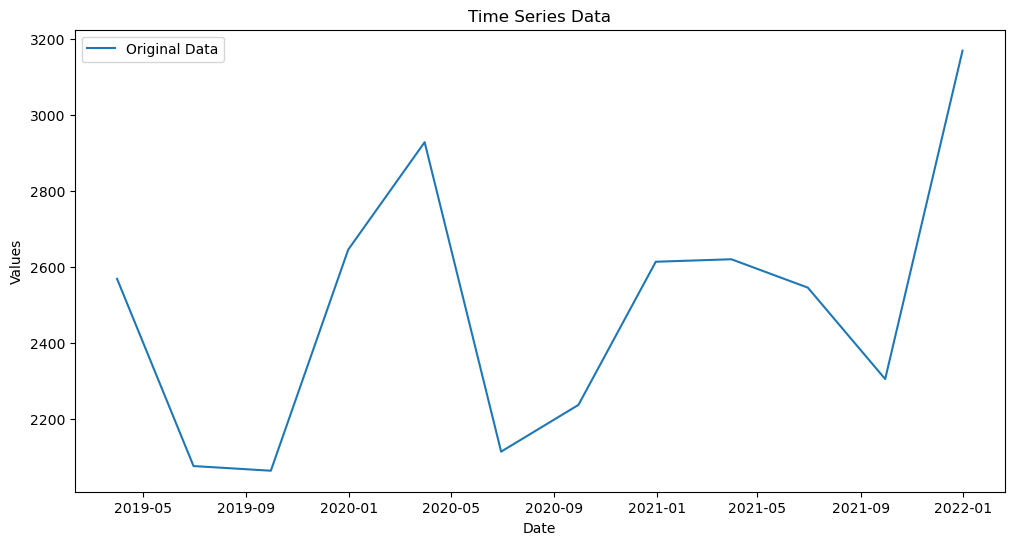

       Test  Statistic   p-value  Used Lags  Number of Observations Used  \
0  ADF Test  -2.815912  0.056037         10                           73   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.523284            -2.902031             -2.588371  
SKU 568


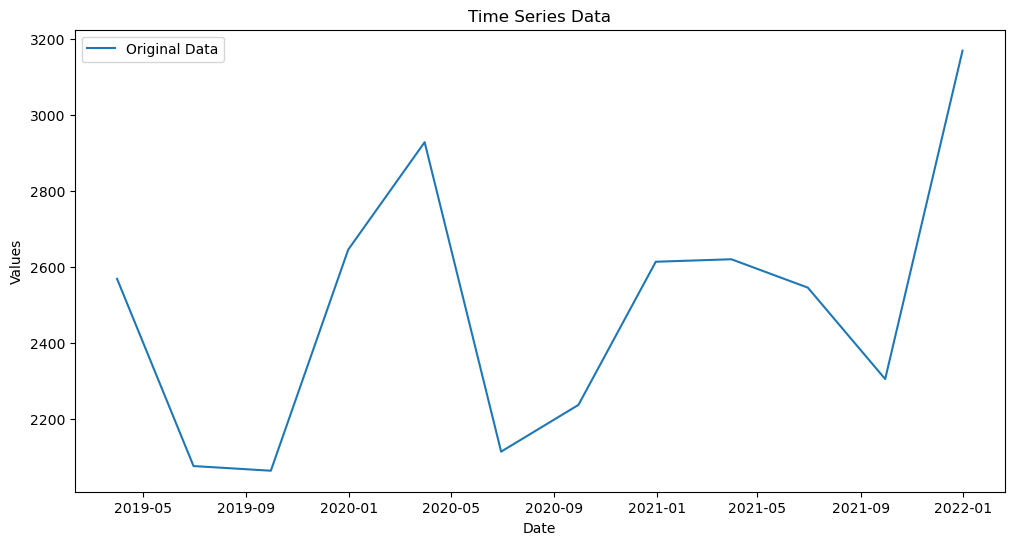

       Test  Statistic   p-value  Used Lags  Number of Observations Used  \
0  ADF Test  -2.815912  0.056037         10                           73   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.523284            -2.902031             -2.588371  
SKU 578


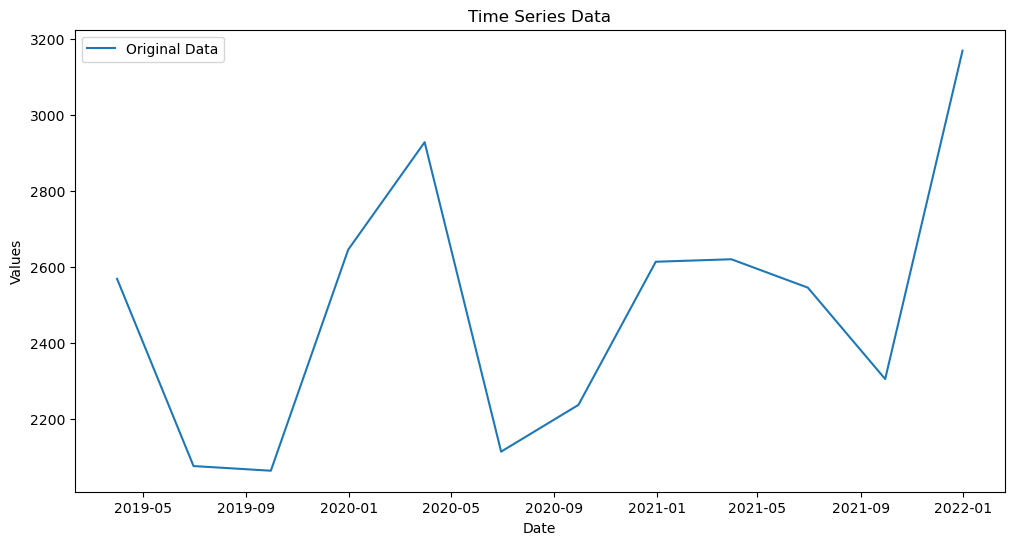

       Test  Statistic   p-value  Used Lags  Number of Observations Used  \
0  ADF Test  -2.815912  0.056037         10                           73   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.523284            -2.902031             -2.588371  
SKU 1050


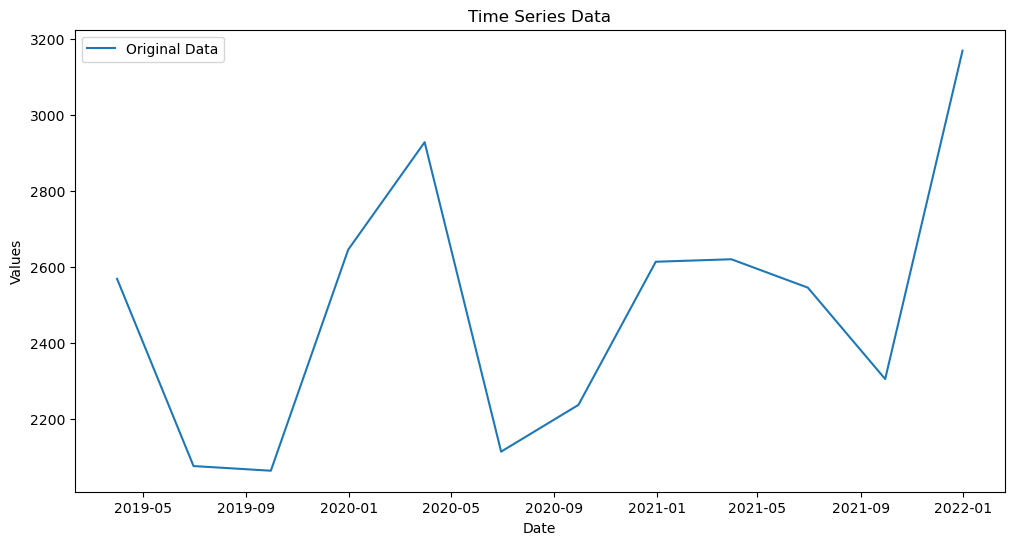

       Test  Statistic   p-value  Used Lags  Number of Observations Used  \
0  ADF Test  -2.815912  0.056037         10                           73   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.523284            -2.902031             -2.588371  


In [36]:
for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    df = data_quarterly[data_quarterly['District'] == district]
    df['YearQuarter'] = df['Year'].astype(str) + '-Q' + df['Quarter'].astype(str)
    results = trend_analysis(df=df, date_column='YearQuarter', value_column='TotalQuantity', freq='Q')
    print(results)
    